# Set up

In [1]:
import json
from postprocessor_3C import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
import subprocess
import time
from os import makedirs
from os.path import isdir, join

# Costs

h2_import_costs = [0.075,0.1,0.105,0.108,0.1125,0.125,0.1375,0.15,0.1625,0.175,0.1875,0.2,0.225,0.25,0.275,0.3]

# scenarios

scenarios = ['base_case','base_case_elec','High_renew','High_renew_elec']

# case studies

css = ['ELEC-OFF','ELEC-H$_2$-OFF']

# sensitivity

sensitivity = 'cost_h2'


C:\Users\jocel\AppData\Local\Temp\ipykernel_25512\1277276162.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png', 'pdf')


# Data import

In [2]:
# Load json files

dictionaries = dict()

for scenario in scenarios:
    dictionaries[scenario] = dict()
    for value in h2_import_costs:
        name_file = '3_clusters_Belgium_'+ scenario + '_' + sensitivity + '_' + str(value)
        name_output = name_file
        file_path = 'C:/Users/jocel/Documents/Doctorat/3_clusters/' + name_file + '.json' # path to the json file
        with open (file_path, 'r') as myfile:
            data = myfile.read() 
        # parse file
        dictionary_3C = json.loads(data)
        dictionaries[scenario][value] = {}
        dictionaries[scenario][value] = dictionary_3C


# Cost differentiation

## Data collection

In [3]:
# Objectives

objectives = dict()

for scenario in scenarios:
    objectives[scenario] = dict()
    for value in h2_import_costs:
        objectives[scenario][value] = dictionaries[scenario][value]['solution']['objective']

# cost difference

cost_difference = dict()
cost_difference['Base'] = dict()
cost_difference['High renew'] = dict()

for value in h2_import_costs:
    cost_difference['Base'][value * 1000] = objectives['base_case_elec'][value] - objectives['base_case'][value]
    cost_difference['High renew'][value * 1000] = objectives['High_renew_elec'][value] - objectives['High_renew'][value]
    
print(transform_into_table(cost_difference))

                75.0       100.0      105.0      108.0      112.5      125.0  \
Base         0.693342   5.260627   8.489892   7.997943   6.887203   3.628440   
High renew  25.019477  73.690472  83.962496  78.301685  77.222420  72.196004   

                137.5      150.0      162.5      175.0      187.5      200.0  \
Base         2.580164   2.504727   2.616310   2.541494   2.882348   3.983883   
High renew  64.004483  62.241390  59.426773  56.705923  54.060864  55.211112   

                225.0      250.0      275.0      300.0  
Base         3.660276   3.712137   4.095515   4.204975  
High renew  65.583926  65.096851  60.037220  58.608555  


## Graphs 

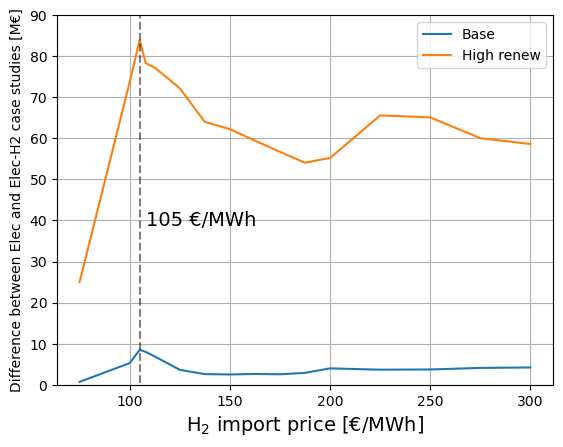

In [4]:
transform_into_table(cost_difference).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Difference between Elec and Elec-H2 case studies [M€]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 90
y = 40
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_costs.pdf',dpi=600)
plt.show()

# Cost differentiation in €/MWh

## Data collection

In [5]:
# Objectives

objectives = dict()

for scenario in scenarios:
    objectives[scenario] = dict()
    for value in h2_import_costs:
        objectives[scenario][value] = dictionaries[scenario][value]['solution']['objective']

# cost difference

cost_difference = dict()
cost_difference['Base'] = dict()
cost_difference['High renew'] = dict()

for value in h2_import_costs:
    cost_difference['Base'][value * 1000] = (objectives['base_case_elec'][value] - objectives['base_case'][value])/226.33
    cost_difference['High renew'][value * 1000] = (objectives['High_renew_elec'][value] - objectives['High_renew'][value])/226.33
    
print(transform_into_table(cost_difference))

               75.0      100.0     105.0     108.0     112.5     125.0  \
Base        0.003063  0.023243  0.037511  0.035338  0.030430  0.016032   
High renew  0.110544  0.325589  0.370974  0.345962  0.341194  0.318986   

               137.5     150.0     162.5     175.0     187.5     200.0  \
Base        0.011400  0.011067  0.011560  0.011229  0.012735  0.017602   
High renew  0.282793  0.275003  0.262567  0.250545  0.238859  0.243941   

               225.0     250.0     275.0     300.0  
Base        0.016172  0.016401  0.018095  0.018579  
High renew  0.289771  0.287619  0.265264  0.258952  


## Graphs 

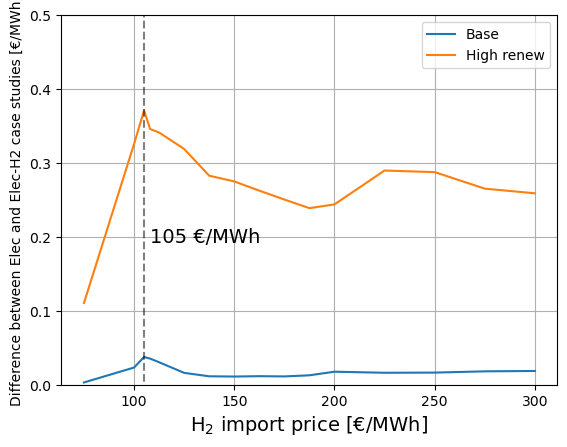

In [6]:
transform_into_table(cost_difference).transpose().plot()
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Difference between Elec and Elec-H2 case studies [€/MWh]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 0.5
y = 4/10 * max_y
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_costs_eur_MWh.pdf',dpi=600)
plt.show()

# Offshore installation

## Base case

### Data collection

In [7]:
scenario = 'base_case' 

capa_off = dict()
capa_off[css[0]] = dict()
capa_off[css[1]] = dict()

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE','ELECTROLYSIS_PLANTS','FUEL_CELLS']
variable = 'new_capacity'

capa_off[css[0]][variable] = dict()
capa_off[css[1]][variable] = dict()

for element in elements:
    capa_off[css[0]][variable][element] = dict()
    capa_off[css[1]][variable][element] = dict()
    for value in h2_import_costs:
        capa_off[css[0]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_off[css[1]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_off[css[0]][variable]))
print(transform_into_table(capa_off[css[1]][variable]))

                     75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  \
WIND_OFFSHORE          8.0    8.0    8.0    8.0    8.0    8.0    8.0    8.0   
ELECTROLYSIS_PLANTS    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
FUEL_CELLS             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                     162.5  175.0  187.5  200.0  225.0  250.0  275.0  300.0  
WIND_OFFSHORE          8.0    8.0    8.0    8.0    8.0    8.0    8.0    8.0  
ELECTROLYSIS_PLANTS    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
FUEL_CELLS             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
                     75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  \
WIND_OFFSHORE         8.00   8.00   8.00   8.00   8.00   8.00   8.00   8.00   
ELECTROLYSIS_PLANTS   0.09   0.45   0.58   0.61   0.51   0.29   0.17   0.11   
FUEL_CELLS            0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

                     162.5  175.0  187.5  200.0  225.0

### Graphs

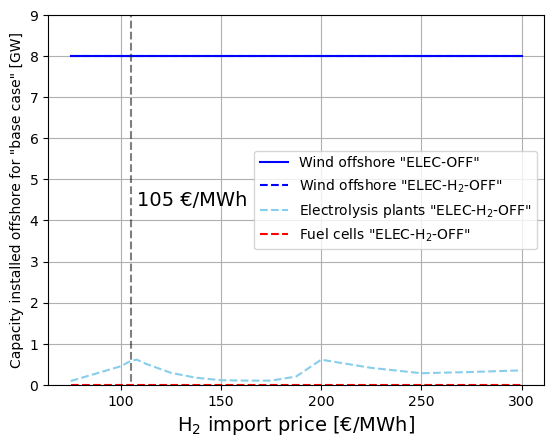

In [8]:
graph_capa_off = dict()

for cs in css:
    graph_capa_off['Wind offshore "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_off['Electrolysis plants "' + cs +'"'] = dict()
        graph_capa_off['Fuel cells "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_capa_off['Wind offshore "' + cs +'"'][value * 1000] = capa_off[cs][variable]['WIND_OFFSHORE'][value * 1000]
        if cs == css[1]:
            graph_capa_off['Electrolysis plants "' + cs +'"'][value * 1000] = capa_off[cs][variable]['ELECTROLYSIS_PLANTS'][value * 1000]
            graph_capa_off['Fuel cells "' + cs +'"'][value * 1000] = capa_off[cs][variable]['FUEL_CELLS'][value * 1000]

df = transform_into_table(graph_capa_off).transpose()
ax = df.plot(style=['-', '--', '--','--'], color=['b', 'b', 'skyblue', 'r'])
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "base case" [GW]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 9
y = 4.5
x = 105
# plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
# plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
# color = 'brown'
# y = 6
# x = 108
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_off_cap_' + scenario + '.pdf',dpi=600)
plt.show()
        

## High renew

### Data collection

In [9]:
scenario = 'High_renew' 

capa_off = dict()
capa_off[css[0]] = dict()
capa_off[css[1]] = dict()

cluster = 'OFFSHORE'
elements = ['WIND_OFFSHORE','ELECTROLYSIS_PLANTS','FUEL_CELLS']
variable = 'new_capacity'

capa_off[css[0]][variable] = dict()
capa_off[css[1]][variable] = dict()

for element in elements:
    capa_off[css[0]][variable][element] = dict()
    capa_off[css[1]][variable][element] = dict()
    for value in h2_import_costs:
        capa_off[css[0]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_off[css[1]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_off[css[0]][variable]))
print(transform_into_table(capa_off[css[1]][variable]))

                     75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  \
WIND_OFFSHORE         7.31    9.3    9.3    9.3    9.3    9.3    9.3    9.3   
ELECTROLYSIS_PLANTS   0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
FUEL_CELLS            0.00    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                     162.5  175.0  187.5  200.0  225.0  250.0  275.0  300.0  
WIND_OFFSHORE          9.3    9.3    9.3    9.3    9.3    9.3    9.3    9.3  
ELECTROLYSIS_PLANTS    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
FUEL_CELLS             0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
                     75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  \
WIND_OFFSHORE         9.30   9.30   9.30   9.30   9.30   9.30    9.3   9.30   
ELECTROLYSIS_PLANTS   1.56   2.57   2.88   2.79   2.81   2.52    2.2   2.15   
FUEL_CELLS            0.00   0.00   0.00   0.00   0.00   0.00    0.0   0.00   

                     162.5  175.0  187.5  200.0  225.0

### Graphs

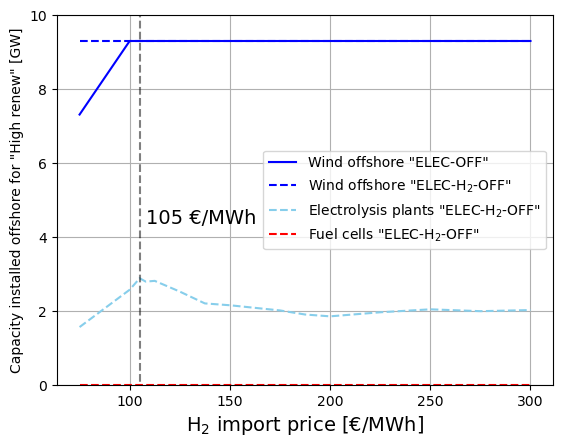

In [10]:
graph_capa_off = dict()

for cs in css:
    graph_capa_off['Wind offshore "' + cs +'"'] = dict()
    if cs == css[1]:
        graph_capa_off['Electrolysis plants "' + cs +'"'] = dict()
        graph_capa_off['Fuel cells "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_capa_off['Wind offshore "' + cs +'"'][value * 1000] = capa_off[cs][variable]['WIND_OFFSHORE'][value * 1000]
        if cs == css[1]:
            graph_capa_off['Electrolysis plants "' + cs +'"'][value * 1000] = capa_off[cs][variable]['ELECTROLYSIS_PLANTS'][value * 1000]
            graph_capa_off['Fuel cells "' + cs +'"'][value * 1000] = capa_off[cs][variable]['FUEL_CELLS'][value * 1000]

df = transform_into_table(graph_capa_off).transpose()
ax = df.plot(style=['-', '--', '--','--'], color=['b', 'b', 'skyblue', 'r'])
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "High renew" [GW]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 10
y = 4.5
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_off_cap_' + scenario + '.pdf',dpi=600)
plt.show()
        

# Production hydrogen

## Base case

### Data collection

In [11]:
scenario = 'base_case' 

prod_h2 = dict()
prod_h2[css[0]] = dict()
prod_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_h2[css[0]][variable] = dict()
prod_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        prod_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'
prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
for value in h2_import_costs:
    prod_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(prod_h2[css[0]][variable]))
print(transform_into_table(prod_h2[css[1]][variable]))

                                 75.0     100.0    105.0     108.0     112.5  \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1694.61  5671.37  6421.41   5630.27   5589.11   
INLAND ELECTROLYSIS_PLANTS        0.00     0.01     0.02      0.01      0.01   
INLAND SMR                        0.00     0.01     0.02  25542.03  27639.16   

                                  125.0     137.5     150.0     162.5  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS   5610.02   5478.87   5451.51   5289.22   
INLAND ELECTROLYSIS_PLANTS         0.01      0.00      0.01      0.01   
INLAND SMR                     30222.09  32572.02  34379.71  35933.26   

                                  175.0     187.5     200.0     225.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS   4752.90   4481.18   4780.57   4302.13   
INLAND ELECTRO

### Graphs

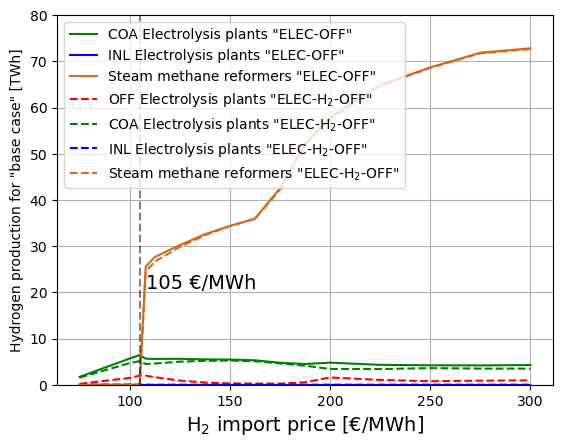

In [12]:
graph_prod_h2 = dict()

element = 'ELECTROLYSIS_PLANTS'

for cs in css:
    if cs == css[1]:
        graph_prod_h2['OFF Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['COA Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['INL Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['Steam methane reformers "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        if cs == css[1]:
            graph_prod_h2['OFF Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['OFFSHORE' + ' ' + element][value * 1000]/1000
        graph_prod_h2['COA Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['ZEEBRUGGE' + ' ' + element][value * 1000]/1000
        graph_prod_h2['INL Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['INLAND' + ' ' + element][value * 1000]/1000
        graph_prod_h2['Steam methane reformers "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['INLAND' + ' ' + 'SMR'][value * 1000]/1000
        
df = transform_into_table(graph_prod_h2).transpose()
ax = df.plot(style=['-'] * 3 + ['--'] * 4, color=[ 'g', 'blue','chocolate','r']*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Hydrogen production for "base case" [TWh]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 80
y = 22
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_h2_prod_' + scenario + '.pdf',dpi=600)
plt.show()
        

## High renew

### Data collection

In [13]:
scenario = 'High_renew' 

prod_h2 = dict()
prod_h2[css[0]] = dict()
prod_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_h2[css[0]][variable] = dict()
prod_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        prod_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'
prod_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_h2[css[1]][variable][cluster + ' ' + element] = dict()
for value in h2_import_costs:
    prod_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(prod_h2[css[0]][variable]))
print(transform_into_table(prod_h2[css[1]][variable]))

                                 75.0      100.0     105.0     108.0  \
OFFSHORE ELECTROLYSIS_PLANTS      0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  8500.77  15276.75  15486.27  14649.88   
INLAND ELECTROLYSIS_PLANTS       10.73   2607.10   3420.63   1571.52   
INLAND SMR                        0.00      0.00      0.58  23933.64   

                                  112.5     125.0     137.5     150.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  13506.21  12653.20  12474.08  12138.82   
INLAND ELECTROLYSIS_PLANTS       822.13    672.14     38.77     26.00   
INLAND SMR                     38421.36  43798.62  47532.55  49821.54   

                                  162.5     175.0     187.5     200.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  11944.02  11653.61  11187.11  11065.29   
INLAND ELECTROLYSIS_PLANTS         0.10      0.04     

### Graphs

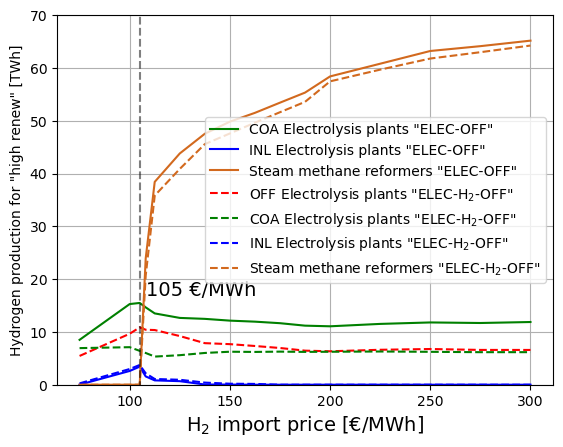

In [14]:
graph_prod_h2 = dict()

element = 'ELECTROLYSIS_PLANTS'
for cs in css:
    if cs == css[1]:
        graph_prod_h2['OFF Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['COA Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['INL Electrolysis plants "' + cs +'"'] = dict()
    graph_prod_h2['Steam methane reformers "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        if cs == css[1]:
            graph_prod_h2['OFF Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['OFFSHORE' + ' ' + element][value * 1000]/1000
        graph_prod_h2['COA Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['ZEEBRUGGE' + ' ' + element][value * 1000]/1000
        graph_prod_h2['INL Electrolysis plants "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['INLAND' + ' ' + element][value * 1000]/1000
        graph_prod_h2['Steam methane reformers "' + cs +'"'][value * 1000] = prod_h2[cs][variable]['INLAND' + ' ' + 'SMR'][value * 1000]/1000

        
df = transform_into_table(graph_prod_h2).transpose()
ax = df.plot(style=['-'] * 3 + ['--'] * 4, color=[ 'g', 'blue','chocolate','r']*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Hydrogen production for "high renew" [TWh]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 70
y = 18
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_h2_prod_' + scenario + '.pdf',dpi=600)
plt.show()
        

# Production vs import H2 

## Base case 

### Data collection

In [15]:
scenario = 'base_case' 

prod_imp_h2 = dict()
prod_imp_h2[css[0]] = dict()
prod_imp_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable = 'imported'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

    
print(transform_into_table(prod_imp_h2[css[0]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[0]]['imported']))
print(transform_into_table(prod_imp_h2[css[1]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[1]]['imported']))

                                 75.0     100.0    105.0     108.0     112.5  \
OFFSHORE ELECTROLYSIS_PLANTS      0.00     0.00     0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  1694.61  5671.37  6421.41   5630.27   5589.11   
INLAND ELECTROLYSIS_PLANTS        0.00     0.01     0.02      0.01      0.01   
INLAND SMR                        0.00     0.01     0.02  25542.03  27639.16   

                                  125.0     137.5     150.0     162.5  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS   5610.02   5478.87   5451.51   5289.22   
INLAND ELECTROLYSIS_PLANTS         0.01      0.00      0.01      0.01   
INLAND SMR                     30222.09  32572.02  34379.71  35933.26   

                                  175.0     187.5     200.0     225.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS   4752.90   4481.18   4780.57   4302.13   
INLAND ELECTRO

### Graph

                                      75.0      100.0     105.0     108.0  \
Production H$_2$ "ELEC-OFF"         1.69461   5.67139   6.42145  31.17231   
Import H$_2$ "ELEC-OFF"            75.98715  72.01447  71.26519  46.51351   
Production H$_2$ "ELEC-H$_2$-OFF"   1.73306   6.14627   7.06527  30.94698   
Import H$_2$ "ELEC-H$_2$-OFF"      75.94891  71.54138  70.62376  46.74145   

                                      112.5     125.0     137.5     150.0  \
Production H$_2$ "ELEC-OFF"        33.22828  35.83212  38.05089  39.83123   
Import H$_2$ "ELEC-OFF"            44.45750  41.85369  39.63477  37.85441   
Production H$_2$ "ELEC-H$_2$-OFF"  32.86013  35.67481  38.00439  39.83764   
Import H$_2$ "ELEC-H$_2$-OFF"      44.82773  42.01207  39.68188  37.84830   

                                      162.5     175.0     187.5     200.0  \
Production H$_2$ "ELEC-OFF"        41.22249  47.29014  56.55150  62.64886   
Import H$_2$ "ELEC-OFF"            36.46297  30.39477  21.13313  15.03921 

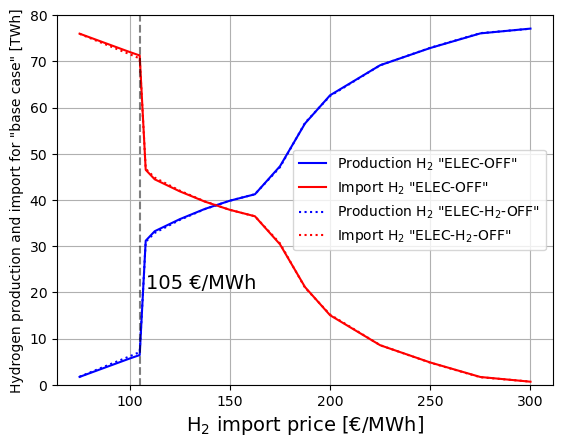

In [16]:
graph_prod_imp_h2 = dict()

for cs in css:
    graph_prod_imp_h2['Production H$_2$ "' + cs +'"'] = dict()
    graph_prod_imp_h2['Import H$_2$ "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_prod_imp_h2['Production H$_2$ "' + cs +'"'][value * 1000] = sum(prod_imp_h2[cs]['h2_produced'][i][value * 1000] for i in prod_imp_h2[cs]['h2_produced'])/1000
        graph_prod_imp_h2['Import H$_2$ "' + cs +'"'][value * 1000] = prod_imp_h2[cs]['imported']['INLAND H2_INTERCONNECTION_NL'][value * 1000]/1000
        
print(transform_into_table(graph_prod_imp_h2))

colors =  ['b', 'r']
nb_var = 2

df = transform_into_table(graph_prod_imp_h2).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Hydrogen production and import for "base case" [TWh]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 80
y = 22
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_h2_pr_vs_imp_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection

In [17]:
scenario = 'High_renew' 

prod_imp_h2 = dict()
prod_imp_h2[css[0]] = dict()
prod_imp_h2[css[1]] = dict()

clusters = ['OFFSHORE', 'ZEEBRUGGE','INLAND']
element = 'ELECTROLYSIS_PLANTS'
variable = 'h2_produced'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

for cluster in clusters:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
    prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

cluster = 'INLAND'        
element = 'SMR'

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

element = 'H2_INTERCONNECTION_NL'
variable = 'imported'

prod_imp_h2[css[0]][variable] = dict()
prod_imp_h2[css[1]][variable] = dict()

prod_imp_h2[css[0]][variable][cluster + ' ' + element] = dict()
prod_imp_h2[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    prod_imp_h2[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    prod_imp_h2[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

    
print(transform_into_table(prod_imp_h2[css[0]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[0]]['imported']))
print(transform_into_table(prod_imp_h2[css[1]]['h2_produced']))
print(transform_into_table(prod_imp_h2[css[1]]['imported']))

                                 75.0      100.0     105.0     108.0  \
OFFSHORE ELECTROLYSIS_PLANTS      0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  8500.77  15276.75  15486.27  14649.88   
INLAND ELECTROLYSIS_PLANTS       10.73   2607.10   3420.63   1571.52   
INLAND SMR                        0.00      0.00      0.58  23933.64   

                                  112.5     125.0     137.5     150.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  13506.21  12653.20  12474.08  12138.82   
INLAND ELECTROLYSIS_PLANTS       822.13    672.14     38.77     26.00   
INLAND SMR                     38421.36  43798.62  47532.55  49821.54   

                                  162.5     175.0     187.5     200.0  \
OFFSHORE ELECTROLYSIS_PLANTS       0.00      0.00      0.00      0.00   
ZEEBRUGGE ELECTROLYSIS_PLANTS  11944.02  11653.61  11187.11  11065.29   
INLAND ELECTROLYSIS_PLANTS         0.10      0.04     

### Graph

                                      75.0      100.0     105.0     108.0  \
Production H$_2$ "ELEC-OFF"         8.51150  17.88385  18.90748  40.15504   
Import H$_2$ "ELEC-OFF"            69.17730  59.81195  58.78853  37.54011   
Production H$_2$ "ELEC-H$_2$-OFF"  12.64012  19.73509  21.01441  39.24257   
Import H$_2$ "ELEC-H$_2$-OFF"      65.05747  57.97074  56.69299  38.46356   

                                      112.5     125.0     137.5     150.0  \
Production H$_2$ "ELEC-OFF"        52.74970  57.12396  60.04540  61.98636   
Import H$_2$ "ELEC-OFF"            24.95989  20.60143  17.67734  15.72457   
Production H$_2$ "ELEC-H$_2$-OFF"  52.59564  56.62065  59.85813  61.71272   
Import H$_2$ "ELEC-H$_2$-OFF"      25.11860  21.11064  17.87371  16.00243   

                                      162.5     175.0     187.5     200.0  \
Production H$_2$ "ELEC-OFF"        63.43570  65.07382  66.51238  69.45617   
Import H$_2$ "ELEC-OFF"            14.25822  12.61825  11.17919   8.25054 

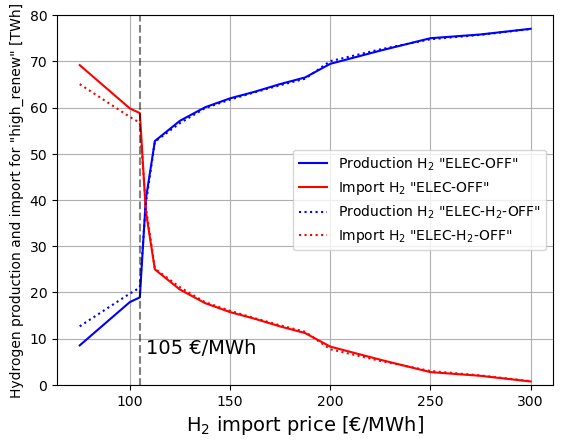

In [18]:
graph_prod_imp_h2 = dict()

for cs in css:
    graph_prod_imp_h2['Production H$_2$ "' + cs +'"'] = dict()
    graph_prod_imp_h2['Import H$_2$ "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_prod_imp_h2['Production H$_2$ "' + cs +'"'][value * 1000] = sum(prod_imp_h2[cs]['h2_produced'][i][value * 1000] for i in prod_imp_h2[cs]['h2_produced'])/1000
        graph_prod_imp_h2['Import H$_2$ "' + cs +'"'][value * 1000] = prod_imp_h2[cs]['imported']['INLAND H2_INTERCONNECTION_NL'][value * 1000]/1000
        
print(transform_into_table(graph_prod_imp_h2)) 
colors = ['b','r']
nb_var = 2

df = transform_into_table(graph_prod_imp_h2).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Hydrogen production and import for "high_renew" [TWh]', fontsize = 10)
plt.grid(True) 
color = 'black'
max_y = 80
y = 8
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_h2_pr_vs_imp_' + scenario + '.pdf',dpi=600)
plt.show()

# Inland installation

## Base case

### Data collection 

In [19]:
scenario = 'base_case' 

capa_inl = dict()
capa_inl[css[0]] = dict()
capa_inl[css[1]] = dict()

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'new_capacity'

capa_inl[css[0]][variable] = dict()
capa_inl[css[1]][variable] = dict()

for element in elements:
    capa_inl[css[0]][variable][element] = dict()
    capa_inl[css[1]][variable][element] = dict()
    for value in h2_import_costs:
        capa_inl[css[0]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inl[css[1]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_inl[css[0]][variable]))
print(transform_into_table(capa_inl[css[1]][variable]))

              75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  162.5  \
PV            28.33  30.08  30.40  31.05  32.49  36.11  39.50  42.62  45.26   
CCGT          11.91  12.26  12.28  12.40  12.31  12.06  11.72  11.54  11.38   
WIND_ONSHORE   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   9.00   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

              175.0  187.5  200.0  225.0  250.0  275.0  300.0  
PV            48.43  50.00  50.00  50.00  50.00  50.00  50.00  
CCGT          11.15  10.94  10.68  10.62  10.62  10.69  10.73  
WIND_ONSHORE   9.00   9.00   9.00   9.00   9.00   9.00   9.00  
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00  
              75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  162.5  \
PV            28.32  30.03  30.18  30.97  32.37  36.01  39.48  42.62  45.28   
CCGT          11.90  12.27  12.37  12.43  12.34  12.07  11.74  11.55  11.38   
WIND_ONSHORE   9.00   9.00   9.00   9.00   9.00

### Graph

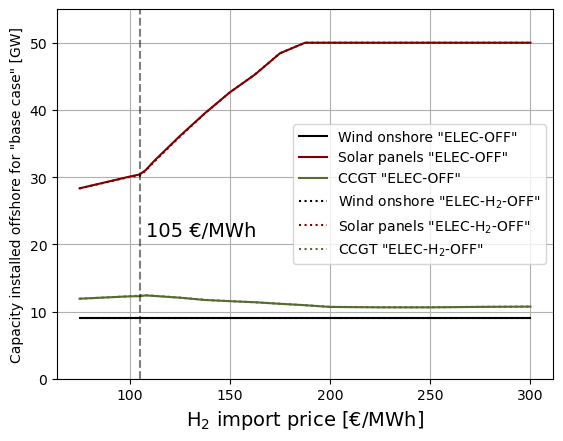

In [20]:
graph_capa_inl = dict()

for cs in css:
    graph_capa_inl['Wind onshore "' + cs +'"'] = dict()
    graph_capa_inl['Solar panels "' + cs +'"'] = dict()
    graph_capa_inl['CCGT "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_capa_inl['Wind onshore "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['WIND_ONSHORE'][value * 1000]
        graph_capa_inl['Solar panels "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['PV'][value * 1000]
        graph_capa_inl['CCGT "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['CCGT'][value * 1000]

colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_capa_inl).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Capacity installed offshore for "base case" [GW]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 55
y = 22
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_inl_cap_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection 

In [21]:
scenario = 'High_renew' 

capa_inl = dict()
capa_inl[css[0]] = dict()
capa_inl[css[1]] = dict()

cluster = 'INLAND'
elements = ['PV','CCGT','WIND_ONSHORE','FUEL_CELLS']
variable = 'new_capacity'

capa_inl[css[0]][variable] = dict()
capa_inl[css[1]][variable] = dict()

for element in elements:
    capa_inl[css[0]][variable][element] = dict()
    capa_inl[css[1]][variable][element] = dict()
    for value in h2_import_costs:
        capa_inl[css[0]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values'][0],2)
        capa_inl[css[1]][variable][element][value * 1000] = round(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values'][0],2)

print(transform_into_table(capa_inl[css[0]][variable]))
print(transform_into_table(capa_inl[css[1]][variable]))

              75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  162.5  \
PV            28.35  29.39  29.56  29.58  29.73  32.36  35.14  37.72  39.86   
CCGT          11.01  11.47  11.54  11.65  11.58  11.26  10.87  10.58  10.38   
WIND_ONSHORE  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50  20.50   
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

              175.0  187.5  200.0  225.0  250.0  275.0  300.0  
PV            42.50  45.18  46.70  46.92  46.92  47.15  47.39  
CCGT          10.12   9.73   9.47   9.44   9.66   9.59   9.57  
WIND_ONSHORE  20.50  20.50  20.50  20.50  20.50  20.50  20.50  
FUEL_CELLS     0.00   0.00   0.00   0.00   0.00   0.00   0.00  
              75.0   100.0  105.0  108.0  112.5  125.0  137.5  150.0  162.5  \
PV            28.43  29.15  29.27  29.42  29.65  32.24  35.17  37.65  39.95   
CCGT          10.91  11.64  11.77  11.80  11.74  11.41  10.99  10.71  10.43   
WIND_ONSHORE  20.50  20.50  20.50  20.50  20.50

### Graph

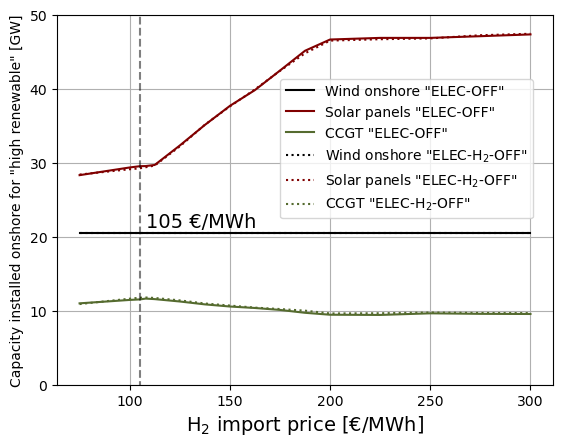

In [22]:
graph_capa_inl = dict()

for cs in css:
    graph_capa_inl['Wind onshore "' + cs +'"'] = dict()
    graph_capa_inl['Solar panels "' + cs +'"'] = dict()
    graph_capa_inl['CCGT "' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_capa_inl['Wind onshore "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['WIND_ONSHORE'][value * 1000]
        graph_capa_inl['Solar panels "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['PV'][value * 1000]
        graph_capa_inl['CCGT "' + cs +'"'][value * 1000] = capa_inl[cs][variable]['CCGT'][value * 1000]

colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_capa_inl).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Capacity installed onshore for "high renewable" [GW]', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 50
y = 22
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
# Add the legend and change its position
ax.legend(loc=(0.45,0.45), fontsize=10)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_inl_cap_' + scenario + '.pdf',dpi=600)
plt.show()

# Gas import and CO2 export

## Base case

### Data collection

In [23]:
scenario = 'base_case'

gaz_imp_exp = dict()
gaz_imp_exp[css[0]] = dict() 
gaz_imp_exp[css[1]] = dict() 

variable = 'imported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

cluster = 'ZEEBRUGGE'
elements = ['NG_INTERCONNECTION_NV','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_FR','REGAS_GREEN']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)
        
cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

variable = 'exported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

element = 'CO2_EXPORT'

gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(gaz_imp_exp[css[0]]['imported']))
print(transform_into_table(gaz_imp_exp[css[0]]['exported']))
print(transform_into_table(gaz_imp_exp[css[1]]['imported']))
print(transform_into_table(gaz_imp_exp[css[1]]['exported']))

                                    75.0      100.0     105.0     108.0  \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.00      0.48      0.91    143.11   
ZEEBRUGGE NG_INTERCONNECTION_FR  78770.46  79362.80  79547.71  82102.11   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     28991.33  30614.77  31483.43  67832.23   

                                    112.5     125.0     137.5     150.0  \
ZEEBRUGGE NG_INTERCONNECTION_NV    184.54    173.84    160.34    171.20   
ZEEBRUGGE NG_INTERCONNECTION_FR  82102.11  82102.12  82102.12  82102.12   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     69138.26  69100.62  69002.49  69010.62   

                                    162.5     175.0     187.5     200.0  \
ZEEBRUGGE NG_INTERCONNE

### Graph

                                              75.0       100.0      105.0  \
Import natural gas "ELEC-OFF"             107.76179  109.97805  111.03205   
Import synthetic CH$_4$ "ELEC-OFF"          0.00000    0.00000    0.00000   
Export CO$_2$"ELEC-OFF"                    21.75515   22.20275   22.41562   
Import natural gas "ELEC-H$_2$-OFF"       107.77653  111.07476  112.72285   
Import synthetic CH$_4$ "ELEC-H$_2$-OFF"    0.00000    0.00000    0.00000   
Export CO$_2$"ELEC-H$_2$-OFF"              21.75813   22.42428   22.75715   

                                              108.0      112.5      125.0  \
Import natural gas "ELEC-OFF"             150.07745  151.42491  151.37658   
Import synthetic CH$_4$ "ELEC-OFF"          0.00000    0.00000    0.00000   
Export CO$_2$"ELEC-OFF"                    30.30236   30.57454   30.56478   
Import natural gas "ELEC-H$_2$-OFF"       150.31566  151.43602  151.38046   
Import synthetic CH$_4$ "ELEC-H$_2$-OFF"    0.00000    0.00000    0.00000  

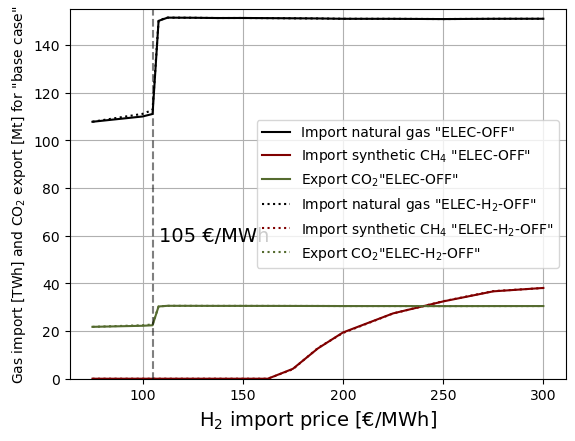

In [24]:
graph_gaz_imp_exp = dict()

for cs in css:
    graph_gaz_imp_exp['Import natural gas "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_gaz_imp_exp['Import natural gas "' + cs +'"'][value * 1000] = sum(gaz_imp_exp[cs]['imported'][i][value * 1000] for i in gaz_imp_exp[cs]['imported'])/1000 - gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value * 1000]/1000
        graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'][value * 1000] = gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value * 1000]/1000
        graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'][value * 1000] = gaz_imp_exp[cs]['exported']['INLAND CO2_EXPORT'][value * 1000]/1000

print(transform_into_table(graph_gaz_imp_exp))
colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_gaz_imp_exp).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Gas import [TWh] and CO$_2$ export [Mt] for "base case"', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 155
y = 60
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_imp_exp_' + scenario + '.pdf',dpi=600)
plt.show()

## High renew

### Data collection

In [25]:
scenario = 'High_renew'

gaz_imp_exp = dict()
gaz_imp_exp[css[0]] = dict() 
gaz_imp_exp[css[1]] = dict() 

variable = 'imported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

cluster = 'ZEEBRUGGE'
elements = ['NG_INTERCONNECTION_NV','NG_INTERCONNECTION_NV','NG_INTERCONNECTION_FR','REGAS_GREEN']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)
        
cluster = 'INLAND'
elements = ['NG_INTERCONNECTION_NL','NG_INTERCONNECTION_DE']

for element in elements:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()
    for value in h2_import_costs:
        gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
        gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

variable = 'exported'

gaz_imp_exp[css[0]][variable] = dict() 
gaz_imp_exp[css[1]][variable] = dict() 

element = 'CO2_EXPORT'

gaz_imp_exp[css[0]][variable][cluster + ' ' + element] = dict() 
gaz_imp_exp[css[1]][variable][cluster + ' ' + element] = dict()

for value in h2_import_costs:
    gaz_imp_exp[css[0]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario+'_elec'][value])['values']),2)
    gaz_imp_exp[css[1]][variable][cluster + ' ' + element][value * 1000] = round(sum(get_cluster_element_variable(cluster,element,variable,dictionaries[scenario][value])['values']),2)

print(transform_into_table(gaz_imp_exp[css[0]]['imported']))
print(transform_into_table(gaz_imp_exp[css[0]]['exported']))
print(transform_into_table(gaz_imp_exp[css[1]]['imported']))
print(transform_into_table(gaz_imp_exp[css[1]]['exported']))

                                    75.0      100.0     105.0     108.0  \
ZEEBRUGGE NG_INTERCONNECTION_NV      0.00      0.01      0.03     40.82   
ZEEBRUGGE NG_INTERCONNECTION_FR  75776.88  76745.64  76987.26  82102.10   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     13757.58  15503.03  16849.73  46086.21   

                                    112.5     125.0     137.5     150.0  \
ZEEBRUGGE NG_INTERCONNECTION_NV    213.74    268.14    268.73    257.21   
ZEEBRUGGE NG_INTERCONNECTION_FR  82102.13  82102.11  82102.10  82102.13   
ZEEBRUGGE REGAS_GREEN                0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_NL         0.00      0.00      0.00      0.00   
INLAND NG_INTERCONNECTION_DE     66190.82  68617.87  68540.51  68445.37   

                                    162.5     175.0     187.5     200.0  \
ZEEBRUGGE NG_INTERCONNE

### Graph

                                             75.0      100.0     105.0  \
Import natural gas "ELEC-OFF"             89.53446  92.24868  93.83702   
Import synthetic CH$_4$ "ELEC-OFF"         0.00000   0.00000   0.00000   
Export CO$_2$"ELEC-OFF"                   18.07371  18.62183  18.94264   
Import natural gas "ELEC-H$_2$-OFF"       86.19986  95.64291  97.71414   
Import synthetic CH$_4$ "ELEC-H$_2$-OFF"   0.00000   0.00000   0.00000   
Export CO$_2$"ELEC-H$_2$-OFF"             17.40035  19.30737  19.72568   

                                              108.0      112.5      125.0  \
Import natural gas "ELEC-OFF"             128.22913  148.50669  150.98812   
Import synthetic CH$_4$ "ELEC-OFF"          0.00000    0.00000    0.00000   
Export CO$_2$"ELEC-OFF"                    25.88902   29.98505   30.48630   
Import natural gas "ELEC-H$_2$-OFF"       127.07732  148.73009  151.04949   
Import synthetic CH$_4$ "ELEC-H$_2$-OFF"    0.00000    0.00000    0.00000   
Export CO$_2$"ELEC-

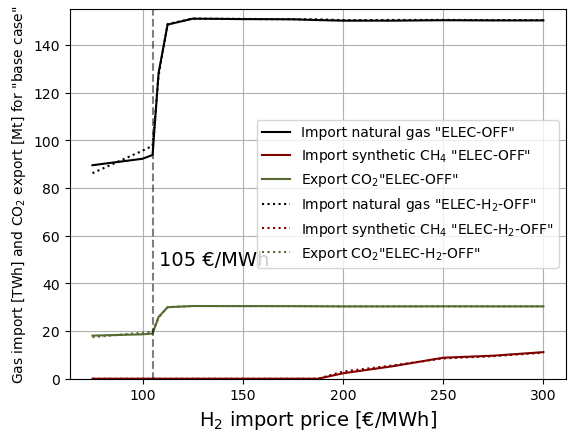

In [26]:
graph_gaz_imp_exp = dict()

for cs in css:
    graph_gaz_imp_exp['Import natural gas "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'] = dict()
    graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'] = dict()
    for value in h2_import_costs: 
        graph_gaz_imp_exp['Import natural gas "' + cs +'"'][value * 1000] = sum(gaz_imp_exp[cs]['imported'][i][value * 1000] for i in gaz_imp_exp[cs]['imported'])/1000 - gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value * 1000]/1000
        graph_gaz_imp_exp['Import synthetic CH$_4$ "' + cs +'"'][value * 1000] = gaz_imp_exp[cs]['imported']['ZEEBRUGGE REGAS_GREEN'][value * 1000]/1000
        graph_gaz_imp_exp['Export CO$_2$"' + cs +'"'][value * 1000] = gaz_imp_exp[cs]['exported']['INLAND CO2_EXPORT'][value * 1000]/1000

print(transform_into_table(graph_gaz_imp_exp))
colors = ['black', 'maroon', 'darkolivegreen','royalblue','orange']
nb_var = 3

df = transform_into_table(graph_gaz_imp_exp).transpose()
ax = df.plot(style=['-'] * nb_var + [':'] * nb_var, color=colors[:nb_var]*2)
plt.xlabel('H$_2$ import price [€/MWh]', fontsize = 14)
plt.ylabel('Gas import [TWh] and CO$_2$ export [Mt] for "base case"', fontsize = 10)
plt.grid(True)
color = 'black'
max_y = 155
y = 50
x = 105
plt.plot([x]*2,[-5,max_y],color = color,linestyle='dashed',alpha=0.5)
plt.text(x+3, y, str(x)+ ' €/MWh', fontsize=14, ha='left', va='center', color=color)
plt.ylim(0,max_y)
plt.savefig('C:\\Users\\jocel\\OneDrive\\Doctorat\\My papers\\Impact of wind offshore on the Belgium energy system\\Article\\Images\\' + 'h2_imp_imp_exp_' + scenario + '.pdf',dpi=600)
plt.show()